In [1]:
# Importing libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, roc_auc_score, roc_curve


In [2]:
# Load the dataset
url = 'https://archive.ics.uci.edu/ml/machine-learning-databases/statlog/german/german.data'
columns = ['Status_of_existing_checking_account', 'Duration_in_month', 'Credit_history', 'Purpose', 'Credit_amount', 
           'Savings_account_bonds', 'Present_employment_since', 'Installment_rate_in_percentage_of_disposable_income', 
           'Personal_status_and_sex', 'Other_debtors_guarantors', 'Present_residence_since', 'Property', 
           'Age_in_years', 'Other_installment_plans', 'Housing', 'Number_of_existing_credits_at_this_bank', 
           'Job', 'Number_of_people_being_liable_to_provide_maintenance_for', 'Telephone', 'Foreign_worker', 'Credit']

In [3]:
df = pd.read_csv(url, header=None, sep=' ', names=columns, index_col=False)
df.head()

,Status_of_existing_checking_account,Duration_in_month,Credit_history,Purpose,Credit_amount,Savings_account_bonds,Present_employment_since,Installment_rate_in_percentage_of_disposable_income,Personal_status_and_sex,Other_debtors_guarantors,...,Property,Age_in_years,Other_installment_plans,Housing,Number_of_existing_credits_at_this_bank,Job,Number_of_people_being_liable_to_provide_maintenance_for,Telephone,Foreign_worker,Credit
0,A11,6,A34,A43,1169,A65,A75,4,A93,A101,...,A121,67,A143,A152,2,A173,1,A192,A201,1
1,A12,48,A32,A43,5951,A61,A73,2,A92,A101,...,A121,22,A143,A152,1,A173,1,A191,A201,2
2,A14,12,A34,A46,2096,A61,A74,2,A93,A101,...,A121,49,A143,A152,1,A172,2,A191,A201,1
3,A11,42,A32,A42,7882,A61,A74,2,A93,A103,...,A122,45,A143,A153,1,A173,2,A191,A201,1
4,A11,24,A33,A40,4870,A61,A73,3,A93,A101,...,A124,53,A143,A153,2,A173,2,A191,A201,2


In [4]:
# Data cleaning
df['Credit'] = df['Credit'].replace({2: 0}) # Replace "2" values in Credit column with "0"
df = pd.get_dummies(df, columns=['Status_of_existing_checking_account', 'Credit_history', 'Purpose', 'Savings_account_bonds', 
                                 'Present_employment_since', 'Personal_status_and_sex', 'Other_debtors_guarantors', 'Property', 
                                 'Other_installment_plans', 'Housing', 'Job', 'Telephone', 'Foreign_worker']) # One-hot encoding

In [5]:
X = df.drop('Credit', axis=1)
y = df['Credit']

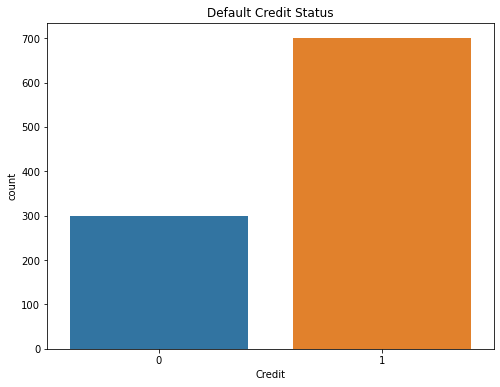

In [6]:
# Exploratory Data Analysis
plt.figure(figsize=(8,6))
sns.countplot(x='Credit', data=df)
plt.title('Default Credit Status')
plt.show()

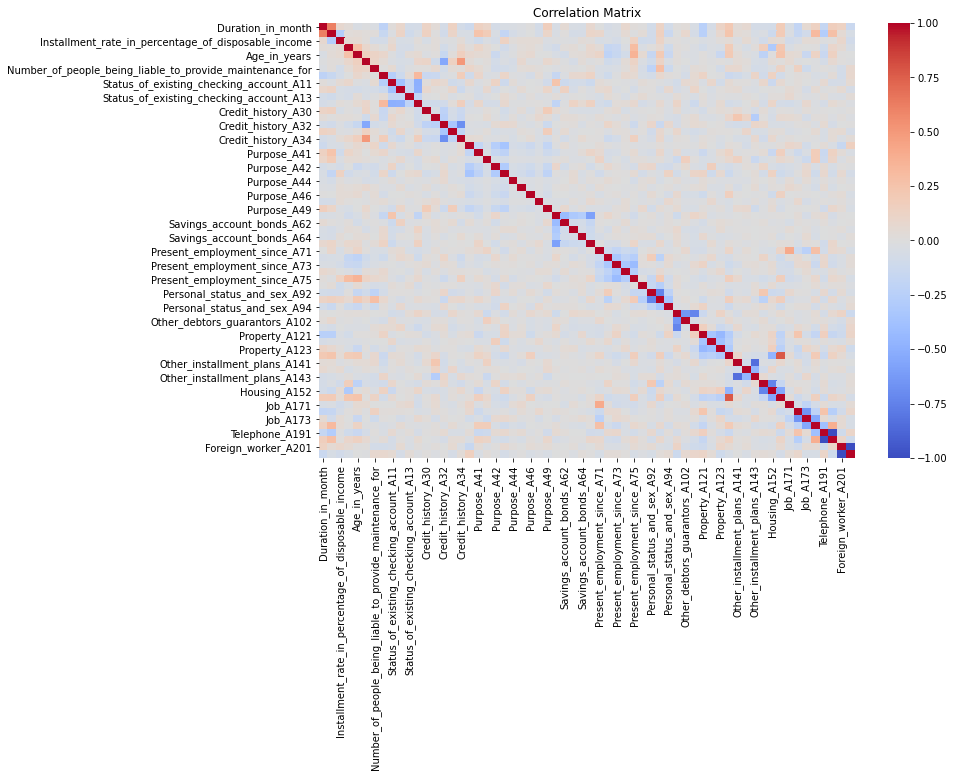

In [7]:
plt.figure(figsize=(12,8))
sns.heatmap(df.corr(), annot=False, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()

# Logistic Regression

In [8]:
# Train-Test Split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [9]:
# Feature Scaling
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [10]:
# Logistic Regression Model
lr = LogisticRegression()
lr.fit(X_train, y_train)

LogisticRegression()

In [11]:
# Model Evaluation
y_pred = lr.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
cm = confusion_matrix(y_test, y_pred)
cr = classification_report(y_test, y_pred)
print('Accuracy: {:.2f}%'.format(accuracy*100))
print('Confusion Matrix:\n', cm)
print('Classification Report:\n', cr)
print('ROC AUC Score:', roc_auc_score(y_test, y_pred))

Accuracy: 80.00%
Confusion Matrix:
 [[ 35  24]
 [ 16 125]]
Classification Report:
               precision    recall  f1-score   support

           0       0.69      0.59      0.64        59
           1       0.84      0.89      0.86       141

    accuracy                           0.80       200
   macro avg       0.76      0.74      0.75       200
weighted avg       0.79      0.80      0.80       200

ROC AUC Score: 0.7398725808390431


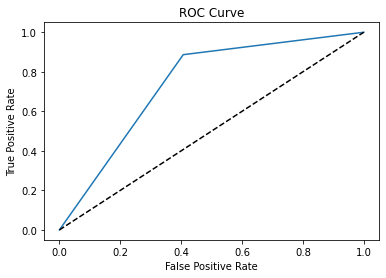

In [12]:
# Plot ROC curve
fpr, tpr, thresholds = roc_curve(y_test, y_pred)
plt.plot(fpr, tpr)
plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.show()

This script loads the German Credit dataset from the UCI Machine Learning Repository, cleans the data by replacing "2" values in the "Credit" column with "0" and performs one-hot encoding. The data is then explored through countplots and a correlation matrix. The script then splits the data into training and testing sets, scales the features using StandardScaler, and fits a Logistic Regression model. Finally, the model is evaluated using accuracy, a confusion matrix, classification report, ROC and AUC score and curve.

# Random Forest

In [13]:
from sklearn.ensemble import RandomForestClassifier

In [14]:
# Fit a Random Forest model
rf = RandomForestClassifier(n_estimators=100, random_state=42)
rf.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

In [15]:
# Predict the test set
y_pred = rf.predict(X_test)

In [16]:
# Calculate the accuracy score
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

Accuracy: 0.805


In [17]:
# Print evaluation metrics
print('Confusion Matrix:\n', confusion_matrix(y_test, y_pred))
print('\nClassification Report:\n', classification_report(y_test, y_pred))
print('ROC AUC Score:', roc_auc_score(y_test, y_pred))

Confusion Matrix:
 [[ 28  31]
 [  8 133]]

Classification Report:
               precision    recall  f1-score   support

           0       0.78      0.47      0.59        59
           1       0.81      0.94      0.87       141

    accuracy                           0.81       200
   macro avg       0.79      0.71      0.73       200
weighted avg       0.80      0.81      0.79       200

ROC AUC Score: 0.7089193412669792


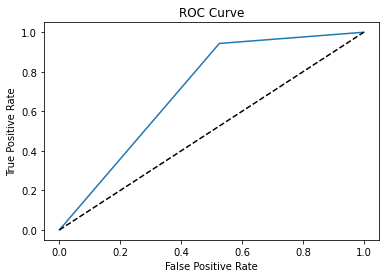

In [18]:
# Plot ROC curve
fpr, tpr, thresholds = roc_curve(y_test, y_pred)
plt.plot(fpr, tpr)
plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.show()